In [1]:
from pathlib import Path

In [2]:
out_folder = Path("visual_stim")

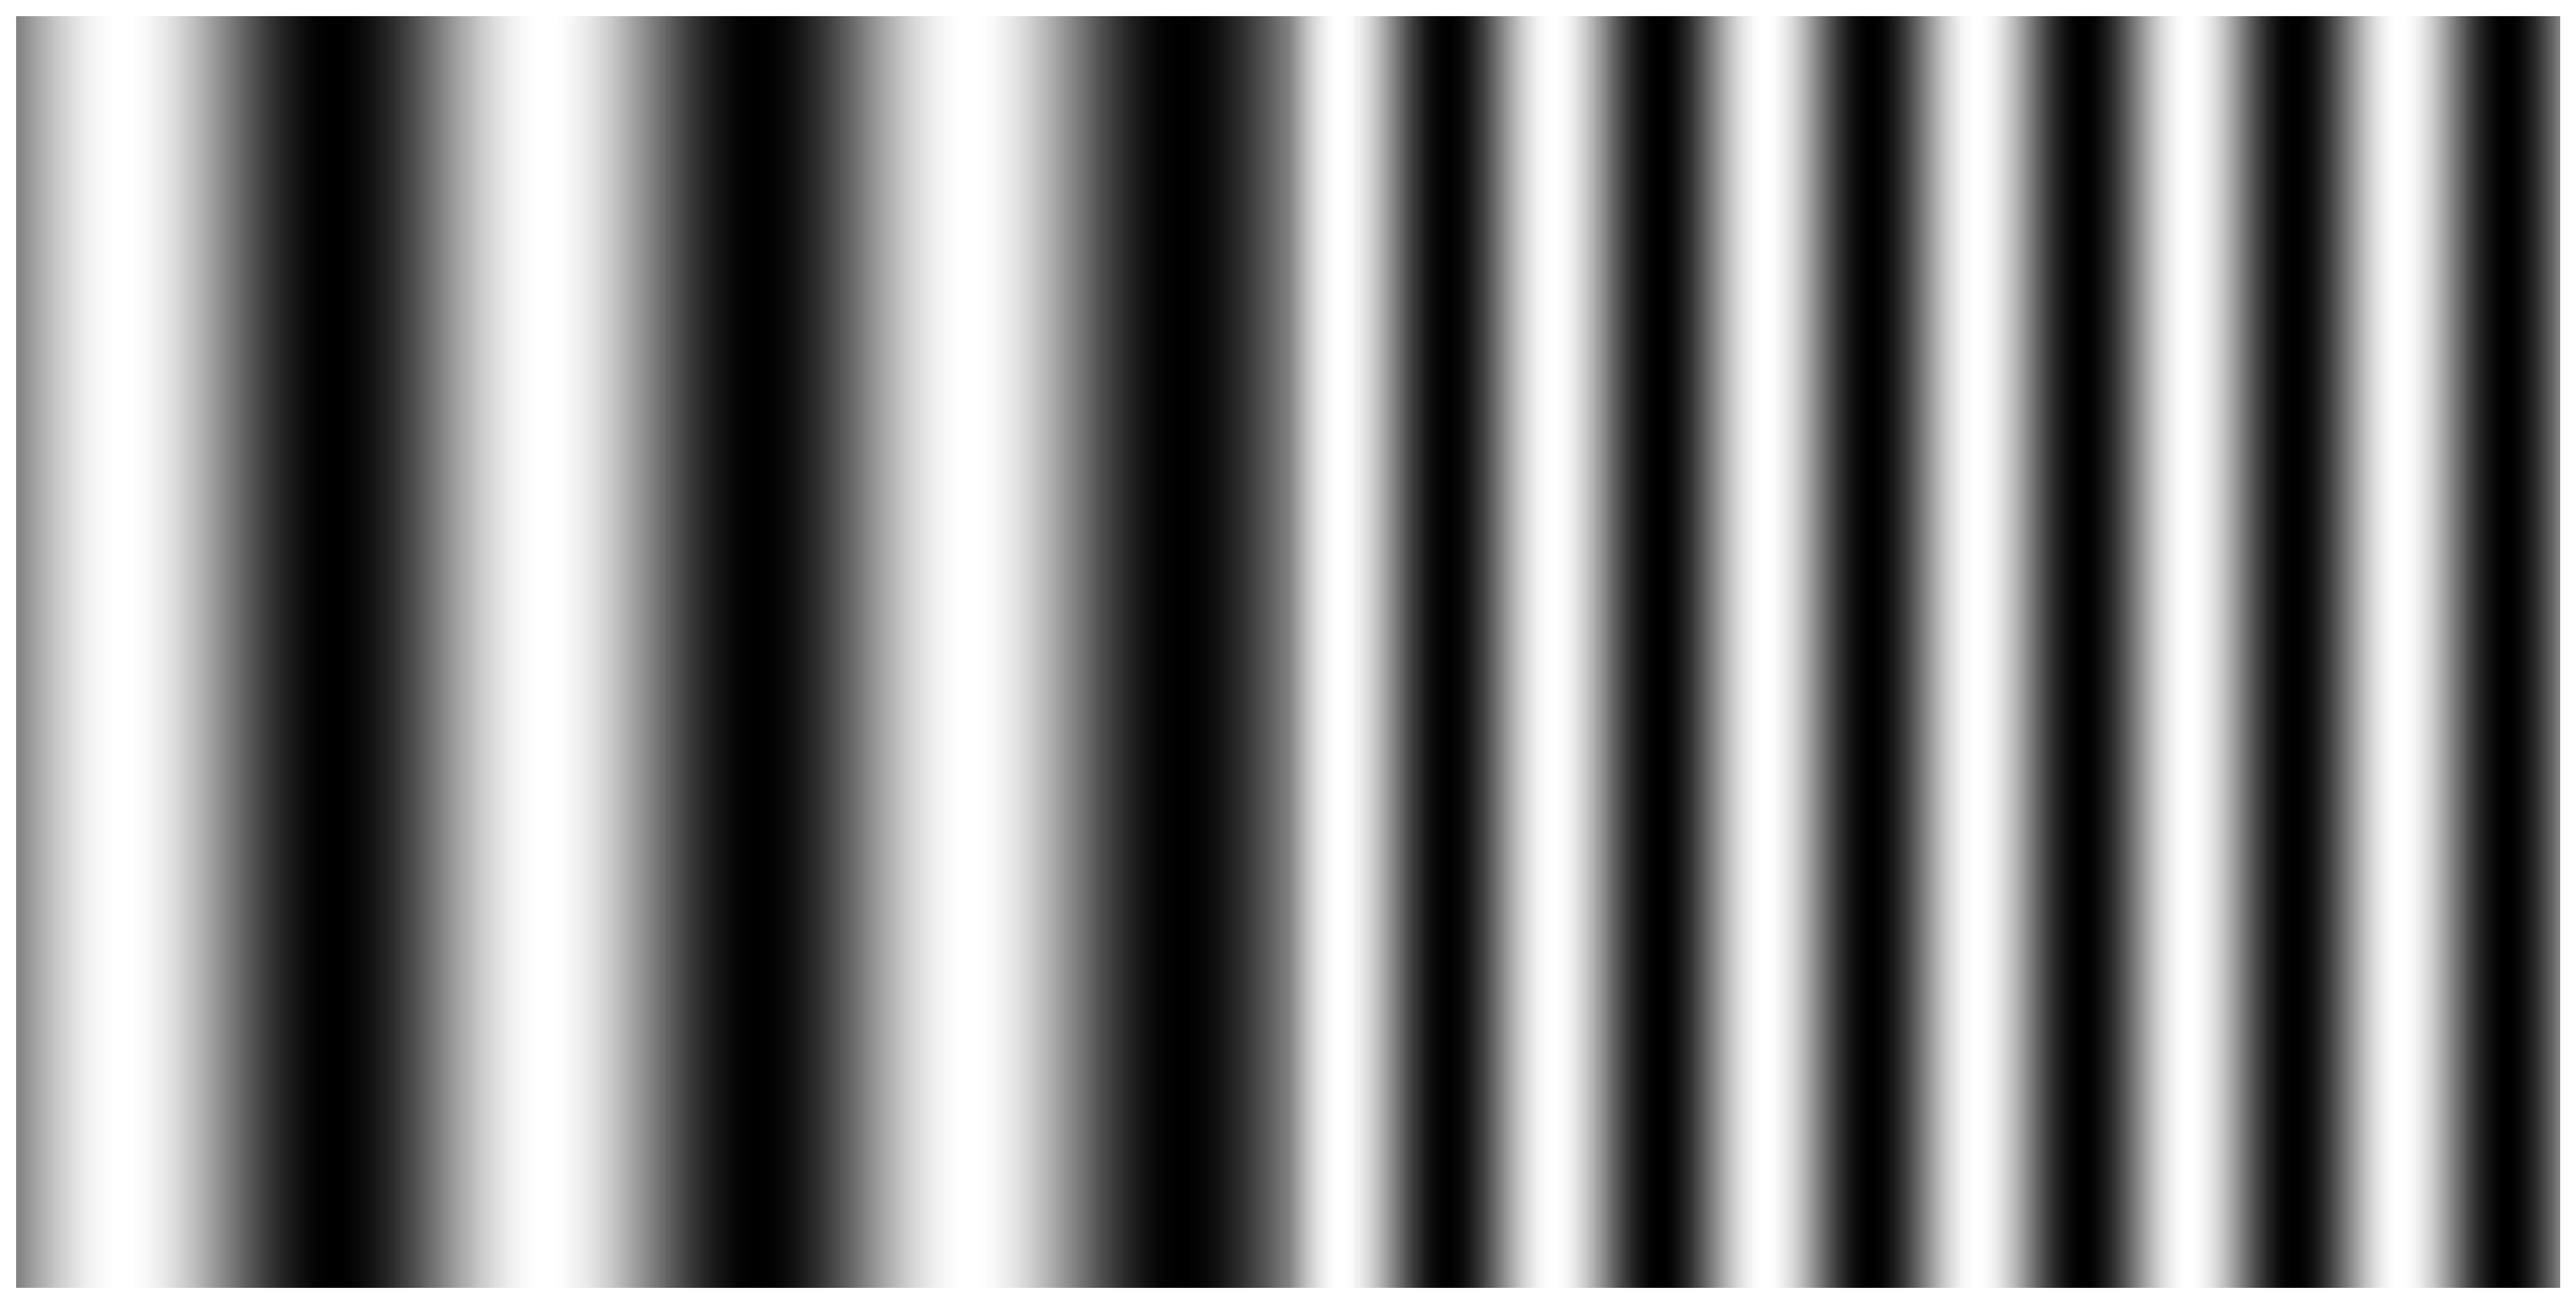

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width, height = 2048, 1024
spatial_freq_a = 3  # Spatial frequency for the left grating
spatial_freq_b = 6  # Spatial frequency for the right grating

# Create the left vertical grating
x_left = np.linspace(0, 2 * np.pi * spatial_freq_a, 1024)
y_left = np.arange(height)
X_left, Y_left = np.meshgrid(x_left, y_left)
left_grating = (np.sin(X_left) + 1) / 2  # Normalize to [0, 1]

# Create the right vertical grating
x_right = np.linspace(0, 2 * np.pi * spatial_freq_b, 1024)
y_right = np.arange(height)
X_right, Y_right = np.meshgrid(x_right, y_right)
right_grating = (np.sin(X_right) + 1) / 2  # Normalize to [0, 1]

# Combine the two gratings into one figure
combined_grating = np.zeros((height, width))
combined_grating[:, :1024] = left_grating
combined_grating[:, 1024:] = right_grating

# Plot the figure
plt.figure(figsize=(20.48, 10.24), dpi=500)
plt.imshow(combined_grating, cmap='gray', extent=[0, width, 0, height])
plt.axis('off')  # Remove axis for better visualization
# plt.title("Left: Spatial Frequency A | Right: Spatial Frequency B")

plt.savefig(out_folder / f"vertical_grating_l{spatial_freq_a}_r{spatial_freq_b}.png", bbox_inches='tight', pad_inches=0)

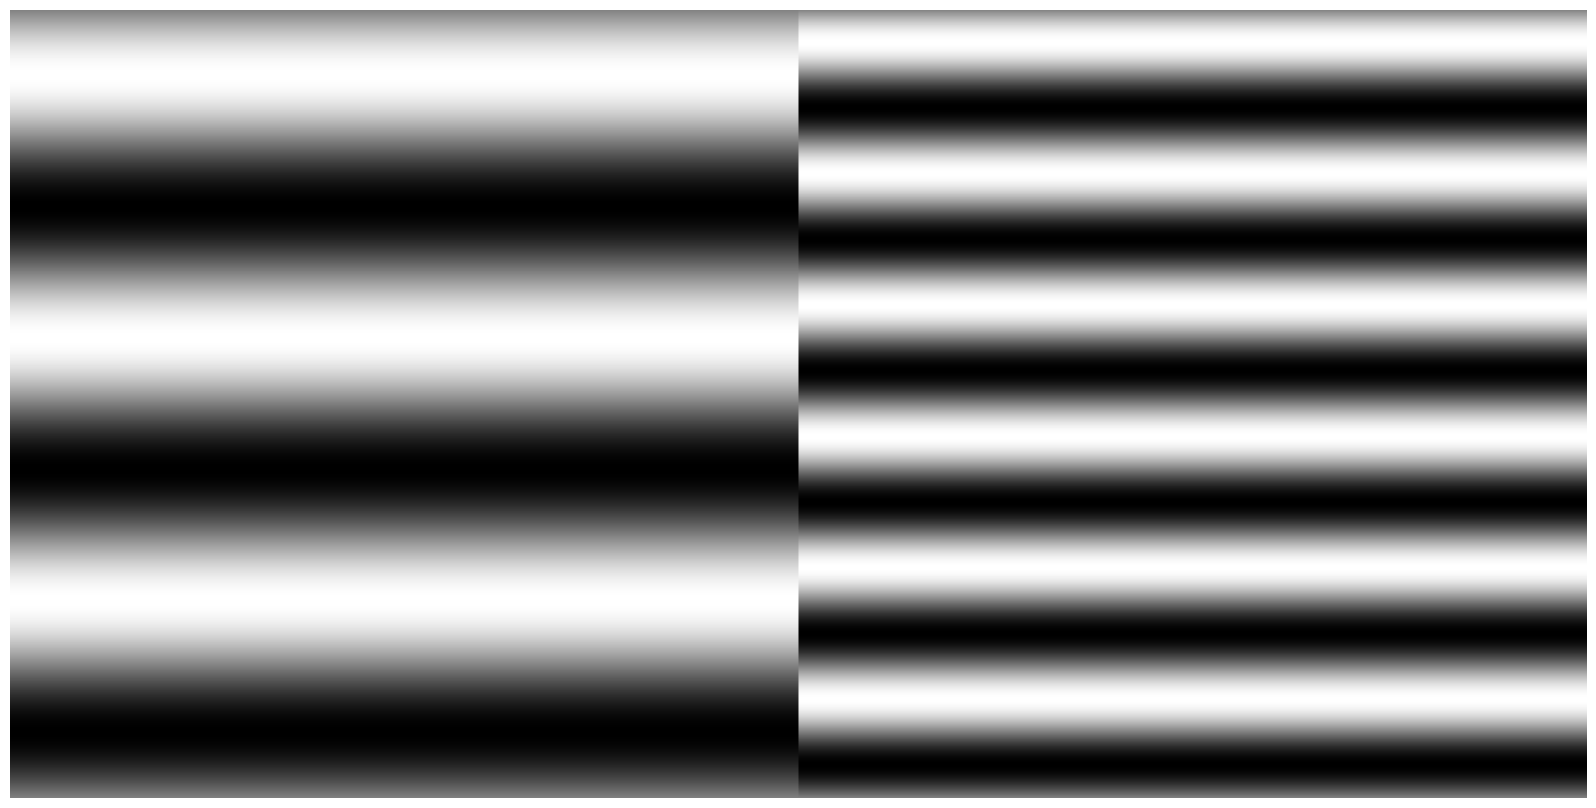

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
width, height = 2048, 1024
spatial_freq_a = 3  # Spatial frequency for the left grating
spatial_freq_b = 6  # Spatial frequency for the right grating

# Create the left horizontal grating
y_left = np.linspace(0, 2 * np.pi * spatial_freq_a, 1024)
x_left = np.arange(1024)
X_left, Y_left = np.meshgrid(x_left, y_left)
left_grating = (np.sin(Y_left) + 1) / 2  # Normalize to [0, 1]

# Create the right horizontal grating
y_right = np.linspace(0, 2 * np.pi * spatial_freq_b, 1024)
x_right = np.arange(1024)
X_right, Y_right = np.meshgrid(x_right, y_right)
right_grating = (np.sin(Y_right) + 1) / 2  # Normalize to [0, 1]

# Combine the two gratings into one figure
combined_grating = np.zeros((height, width))
combined_grating[:, :1024] = left_grating
combined_grating[:, 1024:] = right_grating

# Plot the figure
plt.figure(figsize=(20.48, 10.24))
plt.imshow(combined_grating, cmap='gray', extent=[0, width, 0, height])
plt.axis('off')  # Remove axis for better visualization
# plt.title("Left: Spatial Frequency A (Horizontal) | Right: Spatial Frequency B (Horizontal)")
# plt.show()

plt.savefig(out_folder / f"horizontal_grating_l{spatial_freq_a}_r{spatial_freq_b}.png", bbox_inches='tight', pad_inches=0)

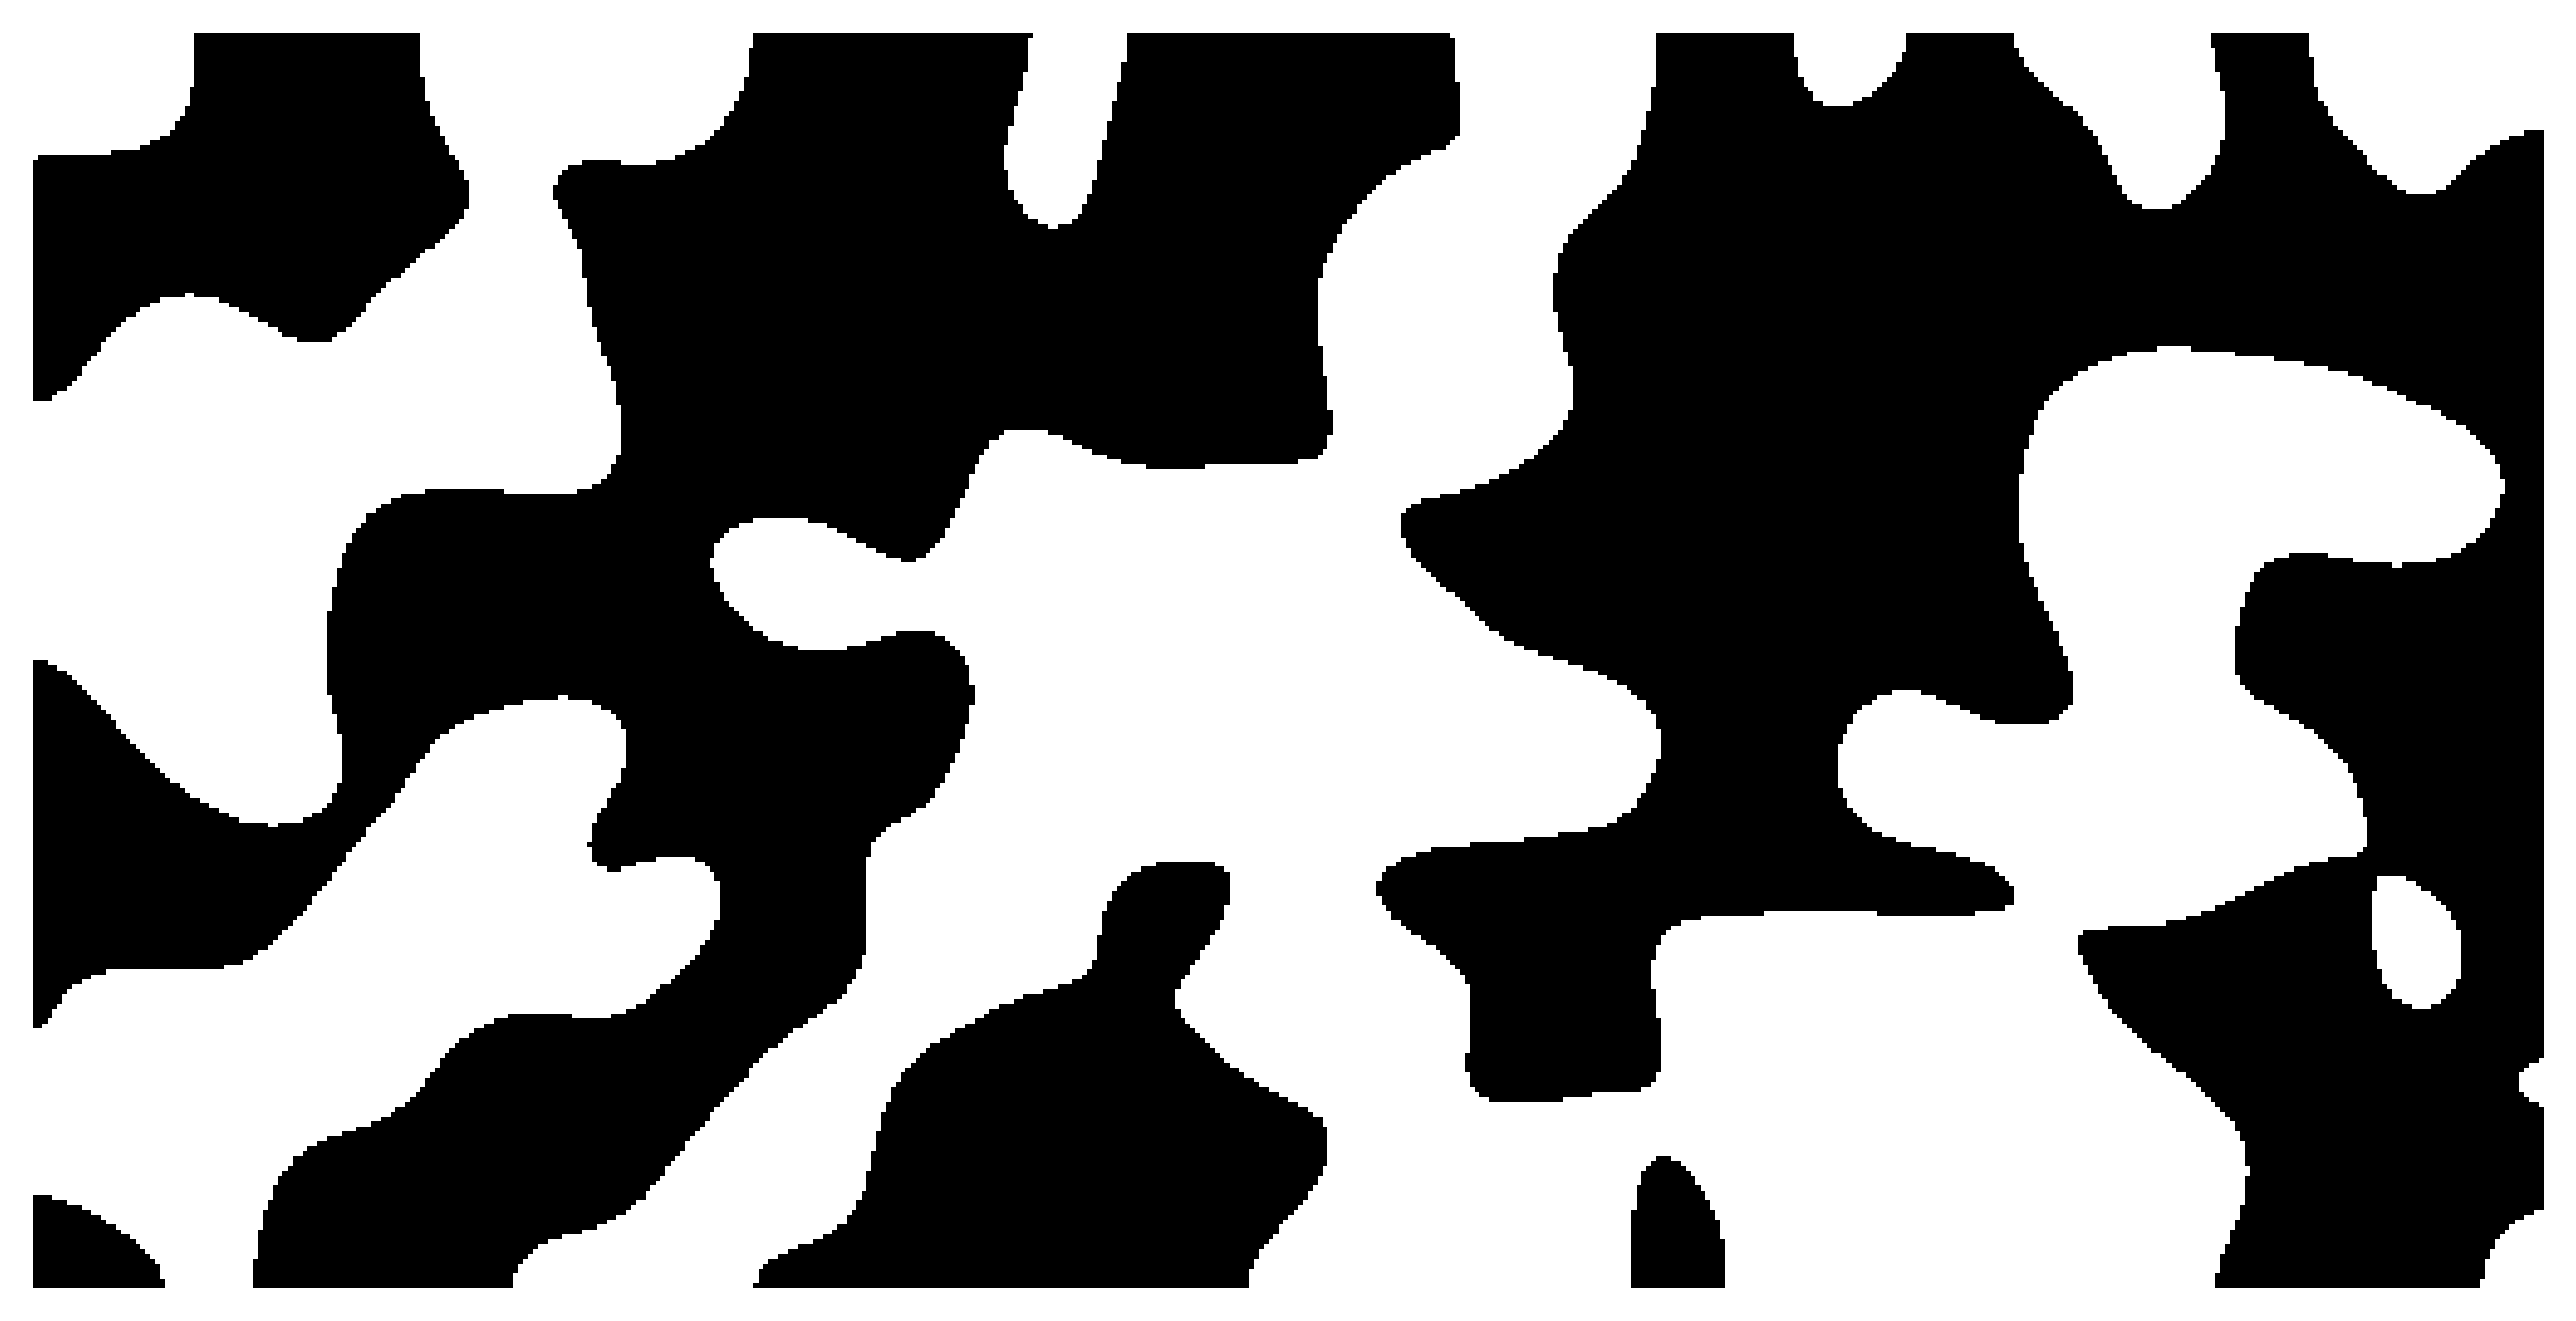

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Parameters
width, height = 512, 256  # Image size
threshold = 0.5  # Threshold to control density of white spots
sigma = 14  # Standard deviation for Gaussian blur (controls smoothness)

# Generate random noise
random_noise = np.random.rand(height, width)

# Apply Gaussian blur to reduce spatial frequency
low_freq_noise = gaussian_filter(random_noise, sigma=sigma)

# Normalize the blurred noise to [0, 1]
low_freq_noise = (low_freq_noise - np.min(low_freq_noise)) / (np.max(low_freq_noise) - np.min(low_freq_noise))

# Apply threshold to create binary (black and white) spots
binary_spots = low_freq_noise > threshold

# Plot the result
plt.figure(figsize=(10, 5), dpi=500)
plt.imshow(binary_spots, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.savefig(out_folder / f"white_noise_sig{sigma}_1.png", bbox_inches='tight', pad_inches=0)